### Importing Dependencies 

In [1]:
import pandas as pd
import numpy as np
# Viz
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='white', context='notebook', palette='deep')
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_curve, roc_auc_score, auc, RocCurveDisplay,ConfusionMatrixDisplay
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import fbeta_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import TomekLinks
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, GridSearchCV, learning_curve, KFold
from sklearn.model_selection import StratifiedKFold
from sklearn import preprocessing
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

### Naming and reading Dataset 

In [2]:
numerical = pd.read_csv(r"C:\Users\s_sad\Downloads\numerical.csv")
categorical = pd.read_csv(r"C:\Users\s_sad\Downloads\categorical.csv")
target = pd.read_csv(r"C:\Users\s_sad\Downloads\target.csv")

In [3]:
numerical.head()

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,CARDGIFT,MINRAMNT,MAXRAMNT,LASTGIFT,TIMELAG,AVGGIFT,CONTROLN,HPHONE_D,RFA_2F,CLUSTER2
0,0,60.000000,5,9,0,0,39,34,18,10,...,14,5.0,12.0,10.0,4,7.741935,95515,0,4,39
1,1,46.000000,6,9,16,0,15,55,11,6,...,1,10.0,25.0,25.0,18,15.666667,148535,0,2,1
2,1,61.611649,3,1,2,0,20,29,33,6,...,14,2.0,16.0,5.0,12,7.481481,15078,1,4,60
3,0,70.000000,1,4,2,0,23,14,31,3,...,7,2.0,11.0,10.0,9,6.812500,172556,1,4,41
4,0,78.000000,3,2,60,1,28,9,53,26,...,8,3.0,15.0,15.0,14,6.864865,7112,1,2,26


In [4]:
df = pd.concat([numerical,categorical,target], axis = 1)

In [5]:
df

,TCODE,AGE,INCOME,WEALTH1,HIT,MALEMILI,MALEVET,VIETVETS,WWIIVETS,LOCALGOV,...,MINRDATE_YR,MINRDATE_MM,MAXRDATE_YR,MAXRDATE_MM,LASTDATE_YR,LASTDATE_MM,FIRSTDATE_YR,FIRSTDATE_MM,TARGET_B,TARGET_D
0,0,60.000000,5,9,0,0,39,34,18,10,...,92,8,94,2,95,12,89,11,0,0.0
1,1,46.000000,6,9,16,0,15,55,11,6,...,93,10,95,12,95,12,93,10,0,0.0
2,1,61.611649,3,1,2,0,20,29,33,6,...,91,11,92,7,95,12,90,1,0,0.0
3,0,70.000000,1,4,2,0,23,14,31,3,...,87,11,94,11,95,12,87,2,0,0.0
4,0,78.000000,3,2,60,1,28,9,53,26,...,93,10,96,1,96,1,79,3,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95407,1,61.611649,5,9,0,14,36,47,11,7,...,96,2,96,2,96,2,96,2,0,0.0
95408,1,48.000000,7,9,1,0,31,43,19,4,...,96,3,96,3,96,3,96,3,0,0.0
95409,1,60.000000,5,9,0,0,18,46,20,7,...,96,3,95,1,96,10,94,10,0,0.0
95410,0,58.000000,7,9,0,0,28,35,20,9,...,90,11,96,8,97,1,86,12,1,18.0


In [6]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95412 entries, 0 to 95411
Data columns (total 339 columns):
 #    Column        Non-Null Count  Dtype  
---   ------        --------------  -----  
 0    TCODE         95412 non-null  int64  
 1    AGE           95412 non-null  float64
 2    INCOME        95412 non-null  int64  
 3    WEALTH1       95412 non-null  int64  
 4    HIT           95412 non-null  int64  
 5    MALEMILI      95412 non-null  int64  
 6    MALEVET       95412 non-null  int64  
 7    VIETVETS      95412 non-null  int64  
 8    WWIIVETS      95412 non-null  int64  
 9    LOCALGOV      95412 non-null  int64  
 10   STATEGOV      95412 non-null  int64  
 11   FEDGOV        95412 non-null  int64  
 12   WEALTH2       95412 non-null  int64  
 13   POP901        95412 non-null  int64  
 14   POP902        95412 non-null  int64  
 15   POP903        95412 non-null  int64  
 16   POP90C1       95412 non-null  int64  
 17   POP90C2       95412 non-null  int64  
 18   POP9

In [7]:
numerical = df.select_dtypes(np.number)
categorical = df.select_dtypes(np.object)

In [8]:
df['TARGET_B'].value_counts()

0    90569
1     4843
Name: TARGET_B, dtype: int64

In [9]:
categorical

,STATE,HOMEOWNR,GENDER,RFA_2R,RFA_2A,GEOCODE2,DOMAIN_A
0,IL,H,F,L,E,C,T
1,CA,H,M,L,G,A,S
2,NC,U,M,L,E,C,R
3,CA,U,F,L,E,C,R
4,FL,H,F,L,F,A,S
...,...,...,...,...,...,...,...
95407,other,H,M,L,G,C,C
95408,TX,H,M,L,F,A,C
95409,MI,H,M,L,E,B,C
95410,CA,H,F,L,F,A,C


In [10]:
#feature_list = ['tenure', 'SeniorCitizen', 'MonthlyCharges','TotalCharges']
X = df.drop(['TARGET_B'],axis = 1)
y = pd.DataFrame(data=df, columns=['TARGET_B'])

In [11]:
X = pd.get_dummies(X, drop_first = True)

In [12]:
#Train Test Split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.20, random_state = 42,shuffle = True, stratify = y)

### Checking Imbalance of Data

In [13]:
# check the distribution
df['TARGET_B'].value_counts()/df.shape[0]

0    0.949241
1    0.050759
Name: TARGET_B, dtype: float64

Model is highly imbalance. We will use SMOTE to balance data and see the results

### 1. SMOTE 

Maximum accuracy:  0.9492218204684798  at K  6


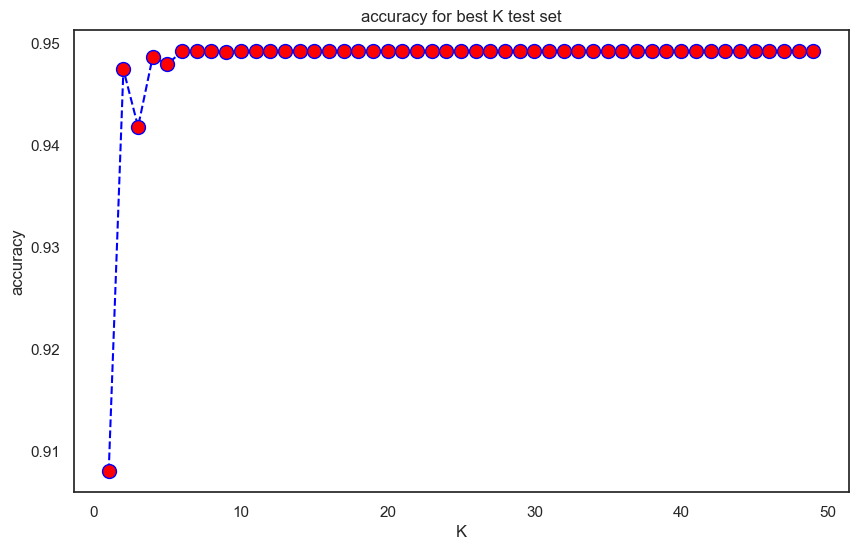

In [14]:
# In order to check which Kneighbor value is best for SMOTE, we have first applied KNeighbor classifier.
# check visually how to choose K with accuracy test set

from sklearn.neighbors import KNeighborsClassifier
accuracy=[]

for neighbor in range(1,50):
    knn= KNeighborsClassifier(n_neighbors=neighbor)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    accuracy.append(accuracy_score(y_test, y_pred))
    
    
plt.figure(figsize=(10,6))
plt.plot(range(1,50), accuracy, color="blue", linestyle="dashed",
         marker = "o", markerfacecolor="red", markersize=10)
plt.title("accuracy for best K test set")
plt.xlabel("K")
plt.ylabel("accuracy")
print("Maximum accuracy: ", max(accuracy), " at K ", accuracy.index(max(accuracy))+1)

In [15]:
sm = SMOTE(k_neighbors = 6)
X_train_SMOTE,y_train_SMOTE = sm.fit_resample(X_train,y_train)

In [16]:
def model_inplace(model, X_train, X_test, y_train, y_test):
    model.fit(X_train,y_train)
    pred_train =model.predict(X_train)
    pred_test = model.predict(X_test)
    print("accuracy on train set:",accuracy_score(y_train,pred_train))
    print("accuracy on test set:",accuracy_score(y_test,pred_test))
    print("f1 on train set:",f1_score(y_train,pred_train))
    print("f1 on test set:",f1_score(y_test,pred_test))
    print(classification_report(y_test, pred_test))

In [17]:
rf = RandomForestClassifier(random_state = 42)

In [18]:
model_inplace(rf, X_train,X_test,y_train,y_test)

accuracy on train set: 1.0
accuracy on test set: 0.9997903893517791
f1 on train set: 1.0
f1 on test set: 0.9979317476732161
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18114
           1       1.00      1.00      1.00       969

    accuracy                           1.00     19083
   macro avg       1.00      1.00      1.00     19083
weighted avg       1.00      1.00      1.00     19083



In [19]:
model_inplace(rf, X_train_SMOTE,X_test,y_train_SMOTE,y_test)

accuracy on train set: 1.0
accuracy on test set: 0.9993711680553372
f1 on train set: 1.0
f1 on test set: 0.9937694704049844
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     18114
           1       1.00      0.99      0.99       969

    accuracy                           1.00     19083
   macro avg       1.00      0.99      1.00     19083
weighted avg       1.00      1.00      1.00     19083



Model is performing best with and without up-sampling Techniques